In [1]:

#! pip install --user --upgrade gender-guesser nltk textblob
#!pip install plotly
#!pip install --user --upgrade wordcloud
#! pip install --user --upgrade pyldavis
#! pip install --user --upgrade matplotlib networkx
#!pip install nbconvert
# General Packages
import numpy as np
import pandas as pd                                       # dataframes
import seaborn as sns  
import matplotlib.pyplot as plt 
import os 
import re

# NLP packages
import nltk 
from textblob import TextBlob
from nltk import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter
from wordcloud import WordCloud

# Modeling packages
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

from pylab import rcParams 
import warnings 
warnings.filterwarnings("ignore")
rcParams["figure.figsize"]= 14,6
plt.style.use("ggplot")



from sklearn.cluster import KMeans                        # k-means clustering 
      # train/test data
from sklearn.neighbors import KNeighborsClassifier        # k-NN classification 
from IPython.display import Image                   
%matplotlib inline

from nltk.tokenize import word_tokenize

from matplotlib import pyplot
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [3]:
import os
from dotenv import load_dotenv, find_dotenv
import pandas as pd
from sqlalchemy import create_engine
from IPython.display import display

# Print current working directory
print("Current working directory:", os.getcwd())

# Find and load the .env file
dotenv_path = find_dotenv()
print("dotenv_path:", dotenv_path)
if dotenv_path:
    print(f".env file found at: {dotenv_path}")
    load_dotenv(dotenv_path)
else:
    raise FileNotFoundError(".env file not found")

# Function to get environment variables and raise an error if not found
def get_env_variable(name):
    value = os.getenv(name)
    if value is None:
        raise ValueError(f"Environment variable {name} not set")
    return value

# Print to check if variables are loaded correctly
print("DB_HOST:", os.getenv('DB_HOST'))
print("DB_PORT:", os.getenv('DB_PORT'))
print("DB_NAME:", os.getenv('DB_NAME'))
print("DB_USER:", os.getenv('DB_USER'))
print("DB_PASSWORD:", os.getenv('DB_PASSWORD'))

# Load database connection details from environment variables
host = get_env_variable('DB_HOST')
port = get_env_variable('DB_PORT')
database = get_env_variable('DB_NAME')
user = get_env_variable('DB_USER')
password = get_env_variable('DB_PASSWORD')
table_name = 'reviews'

# Create a connection string to the PostgreSQL database
connection_string = f'postgresql://{user}:{password}@{host}:{port}/{database}'

try:
    # Create a connection to the PostgreSQL database
    engine = create_engine(connection_string)

    # Load data into a DataFrame
    query = f'SELECT * FROM {table_name}'
    review_df = pd.read_sql_query(query, engine)

    # Display the DataFrame
    display(review_df)
except Exception as e:
    print(f"An error occurred: {e}")


Current working directory: C:\Users\Jay_m\OneDrive\Project-4
dotenv_path: C:\Users\Jay_m\OneDrive\Project-4\.env
.env file found at: C:\Users\Jay_m\OneDrive\Project-4\.env
DB_HOST: localhost
DB_PORT: 5432
DB_NAME: Amazon Reviews
DB_USER: postgres
DB_PASSWORD: postgres


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o..."
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...


In [16]:
review_df.isnull().sum()

Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
Text                      0
dtype: int64

In [17]:
review_df=review_df.dropna()
review_df.isnull().sum(axis=0)

Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
Text                      0
dtype: int64

In [19]:
review_df=review_df[pd.notnull(review_df["Text"])]
review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568454 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568454 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [20]:
col = ["Score","Text"]
review_df =review_df[col]
review_df.head(2)

,Score,Text
0,5,I have bought several of the Vitality canned d...
1,1,Product arrived labeled as Jumbo Salted Peanut...


In [21]:
review_df["Text"]=review_df["Text"].astype(str)
review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   Score   568454 non-null  int64 
 1   Text    568454 non-null  object
dtypes: int64(1), object(1)
memory usage: 8.7+ MB


In [22]:
#changing the datatype of the Text into sstr
review_df["Text"]=review_df["Text"].astype(str)

In [23]:
print(review_df.dtypes)

Score     int64
Text     object
dtype: object


In [24]:
print(review_df["Text"].str.slice(0, 5).head())


0    I hav
1    Produ
2    This 
3    If yo
4    Great
Name: Text, dtype: object


In [25]:
review_df["Score"].value_counts()

Score
5    363122
4     80655
1     52268
3     42640
2     29769
Name: count, dtype: int64

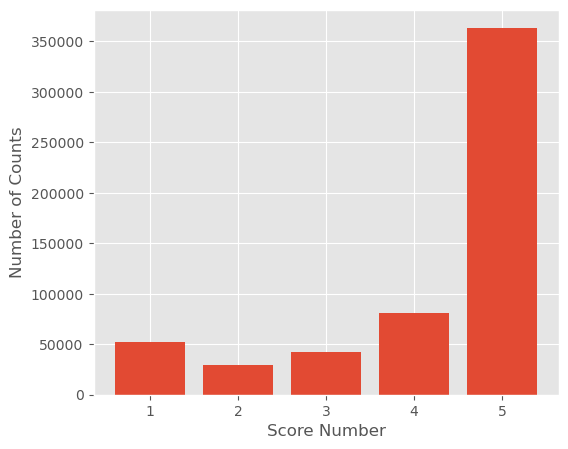

In [26]:
#calucuateing for the score counts
Score_counts =review_df["Score"].value_counts()
#calculating the total counts
total_counts=Score_counts.sum()
#Calucating the percentages
Score_percentages =(Score_counts/total_counts)*100
#Plottings
plt.figure(figsize =(6,5))
plt.bar(Score_counts.index, Score_counts.values)# use index and values to align data correctly
plt.xlabel("Score Number")
plt.ylabel("Number of Counts")
plt.savefig("static/images/score_count.png")
plt.show()

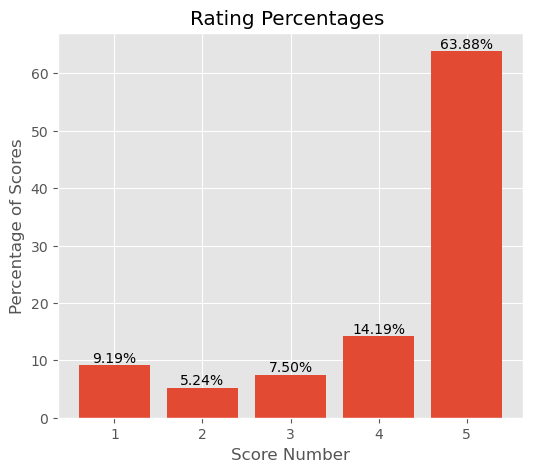

In [27]:
#plotting
plt.figure(figsize=(6,5))
bars=plt.bar(Score_percentages.index,Score_percentages.values)
#adding text labels 
for bar in bars:
    yval = bar.get_height()# get the height for the bar
    plt.text(bar.get_x() + bar.get_width()/2, yval, f"{yval:.2f}%", ha ="center",va="bottom")# position text
plt.xlabel("Score Number")
plt.ylabel("Percentage of Scores")
plt.title("Rating Percentages ")
plt.savefig("static/images/percentage_rating.png")
plt.show()

cleaning the Text reviews


In [28]:
#convert to lower case 
review_df["Text"]=review_df["Text"].str.lower()
review_df.head()

,Score,Text
0,5,i have bought several of the vitality canned d...
1,1,product arrived labeled as jumbo salted peanut...
2,4,this is a confection that has been around a fe...
3,2,if you are looking for the secret ingredient i...
4,5,great taffy at a great price. there was a wid...


In [29]:
#define a function clean the text 
def clean(text): 
#remove all special characters 
    text=re.sub("[^A-Za-z]+"," ",str(text))
    return text
#cleaning the text in the TExt column 
review_df["Text"]=review_df["Text"].apply(clean)
review_df

,Score,Text
0,5,i have bought several of the vitality canned d...
1,1,product arrived labeled as jumbo salted peanut...
2,4,this is a confection that has been around a fe...
3,2,if you are looking for the secret ingredient i...
4,5,great taffy at a great price there was a wide ...
...,...,...
568449,5,great for sesame chicken this is a good if not...
568450,2,i m disappointed with the flavor the chocolate...
568451,5,these stars are small so you can give of those...
568452,5,these are the best treats for training and rew...


In [30]:
import nltk
nltk.download("punkt") #sentence tokenization

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Jay_m\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [31]:
review_df["sentences"]=review_df.Text.apply(lambda x: nltk.sent_tokenize(x))
review_df.head()

,Score,Text,sentences
0,5,i have bought several of the vitality canned d...,[i have bought several of the vitality canned ...
1,1,product arrived labeled as jumbo salted peanut...,[product arrived labeled as jumbo salted peanu...
2,4,this is a confection that has been around a fe...,[this is a confection that has been around a f...
3,2,if you are looking for the secret ingredient i...,[if you are looking for the secret ingredient ...
4,5,great taffy at a great price there was a wide ...,[great taffy at a great price there was a wide...


In [19]:
import nltk
#Tokenninzing the Text
review_df["Text_tok"]=review_df["Text"].apply(lambda x: nltk.sent_tokenize(x))
review_df.head()

,Score,Text,sentences,Text_tok
0,5,i have bought several of the vitality canned d...,[i have bought several of the vitality canned ...,[i have bought several of the vitality canned ...
1,1,product arrived labeled as jumbo salted peanut...,[product arrived labeled as jumbo salted peanu...,[product arrived labeled as jumbo salted peanu...
2,4,this is a confection that has been around a fe...,[this is a confection that has been around a f...,[this is a confection that has been around a f...
3,2,if you are looking for the secret ingredient i...,[if you are looking for the secret ingredient ...,[if you are looking for the secret ingredient ...
4,5,great taffy at a great price there was a wide ...,[great taffy at a great price there was a wide...,[great taffy at a great price there was a wide...


In [32]:
from nltk.corpus import stopwords
nltk.download("stopwords")
stop_words = stopwords.words("english")
stop_words

filtered_sent=[]
for w in review_df.sentences: 
    if w not in stop_words: 
        filtered_sent.append(w)
print("Tokenized Sentences: ", review_df.sentences)
print("Filtered Sentence:",filtered_sent)
review_df["filtered_sent"]=filtered_sent
review_df.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Jay_m\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


Tokenized Sentences:  0         [i have bought several of the vitality canned ...
1         [product arrived labeled as jumbo salted peanu...
2         [this is a confection that has been around a f...
3         [if you are looking for the secret ingredient ...
4         [great taffy at a great price there was a wide...
                                ...                        
568449    [great for sesame chicken this is a good if no...
568450    [i m disappointed with the flavor the chocolat...
568451    [these stars are small so you can give of thos...
568452    [these are the best treats for training and re...
568453    [i am very satisfied product is as advertised ...
Name: sentences, Length: 568454, dtype: object
Filtered Sentence: 

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



,Score,Text,sentences,filtered_sent
0,5,i have bought several of the vitality canned d...,[i have bought several of the vitality canned ...,[i have bought several of the vitality canned ...
1,1,product arrived labeled as jumbo salted peanut...,[product arrived labeled as jumbo salted peanu...,[product arrived labeled as jumbo salted peanu...
2,4,this is a confection that has been around a fe...,[this is a confection that has been around a f...,[this is a confection that has been around a f...
3,2,if you are looking for the secret ingredient i...,[if you are looking for the secret ingredient ...,[if you are looking for the secret ingredient ...
4,5,great taffy at a great price there was a wide ...,[great taffy at a great price there was a wide...,[great taffy at a great price there was a wide...


In [33]:
#create a list of all sentences 

all_sentences = []
for o in range(len(review_df)):
    l = len(review_df.iloc[o]["filtered_sent"])
    for p in range(l):
        t = review_df.iloc[o]["filtered_sent"][p]
        all_sentences.append(t)   

In [34]:
#create a new dataframeabs
df_sentences = pd.DataFrame()
df_sentences["all_sentences"]=all_sentences

In [35]:
df_sentences

,all_sentences
0,i have bought several of the vitality canned d...
1,product arrived labeled as jumbo salted peanut...
2,this is a confection that has been around a fe...
3,if you are looking for the secret ingredient i...
4,great taffy at a great price there was a wide ...
...,...
568448,great for sesame chicken this is a good if not...
568449,i m disappointed with the flavor the chocolate...
568450,these stars are small so you can give of those...
568451,these are the best treats for training and rew...


In [36]:
df_sentences.isnull().values.any()

False

In [37]:
#create functions to obtain Polarity, values and label the Text based on the polarity 

def getPolarity(all_sentences): 
    return TextBlob(all_sentences).sentiment.polarity

#function to anlyze the all_sentences

def analysis(score): 
    if score < 0: 
        return "Negative"
    elif score == 0: 
        return "Neutral"
    else:
        return "Positive"
    

Apply The above funcitons

In [38]:
df_sentences["Polarity"]=df_sentences["all_sentences"].apply(getPolarity)
df_sentences["Sentiment"]=df_sentences["Polarity"].apply(analysis)

#remove Analysis that is Neutral 
df_sentences=df_sentences[df_sentences["Sentiment"]!="Neutral"]
df_sentences=df_sentences.loc[:,["all_sentences","Polarity","Sentiment"]]
df_sentences


,all_sentences,Polarity,Sentiment
0,i have bought several of the vitality canned d...,0.450000,Positive
1,product arrived labeled as jumbo salted peanut...,-0.033333,Negative
2,this is a confection that has been around a fe...,0.133571,Positive
3,if you are looking for the secret ingredient i...,0.166667,Positive
4,great taffy at a great price there was a wide ...,0.483333,Positive
...,...,...,...
568448,great for sesame chicken this is a good if not...,0.204167,Positive
568449,i m disappointed with the flavor the chocolate...,-0.208333,Negative
568450,these stars are small so you can give of those...,-0.021875,Negative
568451,these are the best treats for training and rew...,0.521429,Positive


In [27]:
df_sentences["Sentiment"].value_counts()

Sentiment
Positive    503171
Negative     57440
Name: count, dtype: int64

<Axes: xlabel='Sentiment'>

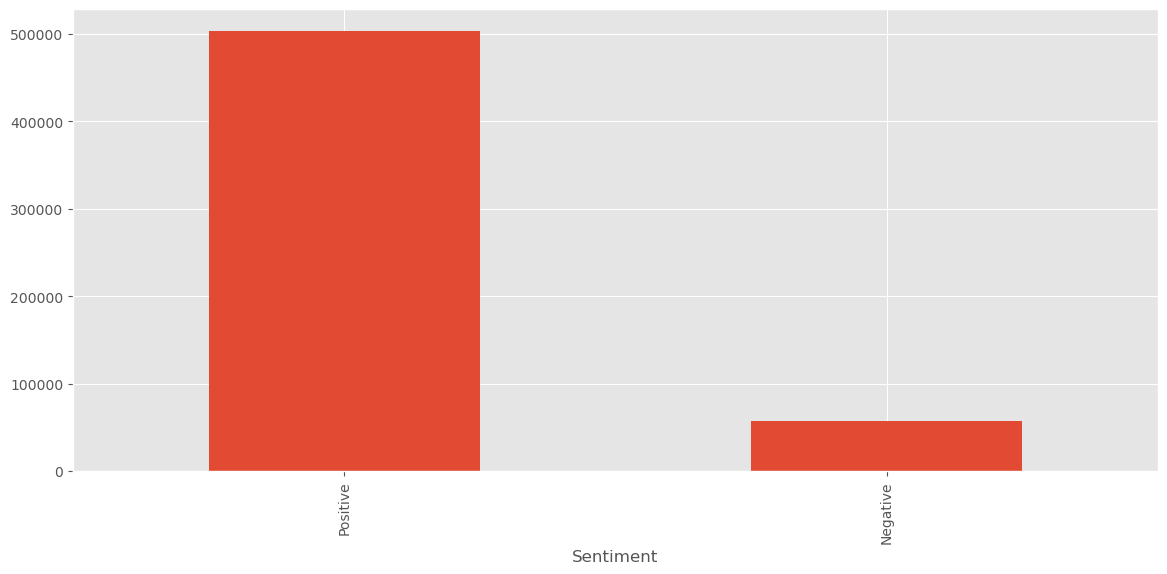

In [39]:
df_sentences["Sentiment"].value_counts().plot.bar()

In [40]:
Positive_Negative_Polarity = 100*df_sentences["Sentiment"].value_counts()/len(df_sentences)
Positive_Negative_Polarity

Sentiment
Positive    89.754808
Negative    10.245192
Name: count, dtype: float64

In [41]:
#removing stopwords and high/low frequency wordsabs
from nltk.corpus import stopwords
noise_words = []
eng_stop_words = stopwords.words("english")
eng_stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [42]:
#removing stop words 
stop_words = set(eng_stop_words)
without_stop_words=[]
stopword =[]
Text=review_df["Text"][0]
words = nltk.word_tokenize(Text)

for word in words:
    if word in stop_words: 
        stopword.append(word) 
    else:
        without_stop_words.append(word) 


In [43]:
print("-- Original sentence--\n", all_sentences[0])
print("\n--stopwords in the sentence--\n",stopword)
print("\n--non-stopwords in the sentences --\n",without_stop_words)

-- Original sentence--
 i have bought several of the vitality canned dog food products and have found them all to be of good quality the product looks more like a stew than a processed meat and it smells better my labrador is finicky and she appreciates this product better than most

--stopwords in the sentence--
 ['i', 'have', 'of', 'the', 'and', 'have', 'them', 'all', 'to', 'be', 'of', 'the', 'more', 'a', 'than', 'a', 'and', 'it', 'my', 'is', 'and', 'she', 'this', 'than', 'most']

--non-stopwords in the sentences --
 ['bought', 'several', 'vitality', 'canned', 'dog', 'food', 'products', 'found', 'good', 'quality', 'product', 'looks', 'like', 'stew', 'processed', 'meat', 'smells', 'better', 'labrador', 'finicky', 'appreciates', 'product', 'better']


In [44]:
def stopwords_removal(stop_words, sentence): 
    return[word for word in nltk.word_tokenize(sentence) if word not in stop_words] 
review_df["Text_nonstop"]=review_df["Text"].apply(lambda row: stopwords_removal(stop_words, row))

review_df =review_df[["Text","Text_nonstop"]]
review_df

,Text,Text_nonstop
0,i have bought several of the vitality canned d...,"[bought, several, vitality, canned, dog, food,..."
1,product arrived labeled as jumbo salted peanut...,"[product, arrived, labeled, jumbo, salted, pea..."
2,this is a confection that has been around a fe...,"[confection, around, centuries, light, pillowy..."
3,if you are looking for the secret ingredient i...,"[looking, secret, ingredient, robitussin, beli..."
4,great taffy at a great price there was a wide ...,"[great, taffy, great, price, wide, assortment,..."
...,...,...
568449,great for sesame chicken this is a good if not...,"[great, sesame, chicken, good, better, restura..."
568450,i m disappointed with the flavor the chocolate...,"[disappointed, flavor, chocolate, notes, espec..."
568451,these stars are small so you can give of those...,"[stars, small, give, one, training, session, t..."
568452,these are the best treats for training and rew...,"[best, treats, training, rewarding, dog, good,..."


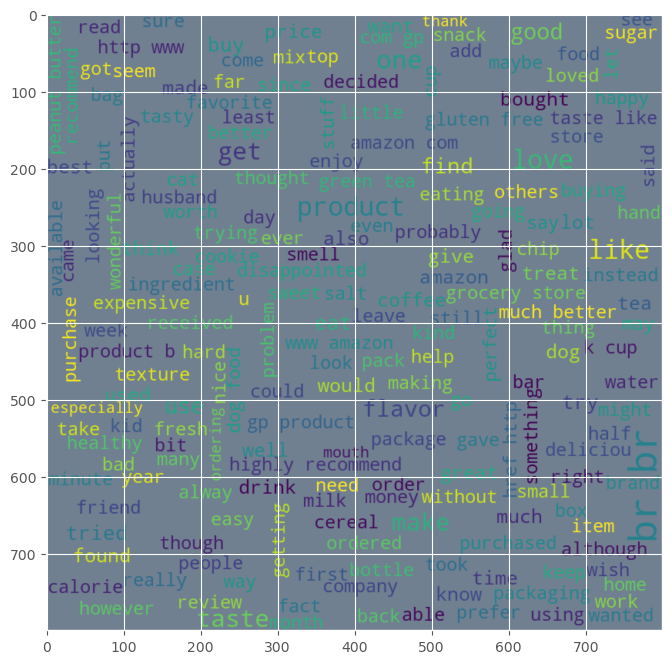

In [45]:
# Create wordcloud  to see most frequenty used words in all_sentences 

from nltk.corpus import stopwords
from wordcloud import WordCloud

stop_words = set(stopwords.words("english"))
textt = " ".join(review for review in df_sentences["all_sentences"])

wordcloud = WordCloud(width = 800, height = 800, max_font_size=50,min_font_size = 10,
                stopwords =  stop_words, background_color="slategray").generate(textt)
plt.figure(figsize=(10,8))
plt.imshow(wordcloud,interpolation="bilinear")
plt.savefig("static/images/wordcloud.png",dpi=150)
plt.show()


In [46]:
# from the above some popular words can be observed include love, good , taset, sugar..abs
#these words are mostly positive, indicating that most reviews in the dataset express a positive sentiment



# More Data Analysis


In [47]:
positive_sentiment = df_sentences[df_sentences["Sentiment"]=="Positive"]
negative_sentiment=df_sentences[df_sentences["Sentiment"]=="Negative"]
negative_sentiment.head(2)

,all_sentences,Polarity,Sentiment
1,product arrived labeled as jumbo salted peanut...,-0.033333,Negative
14,the strawberry twizzlers are my guilty pleasur...,-0.500000,Negative


# WordCloud Positive Sentiment

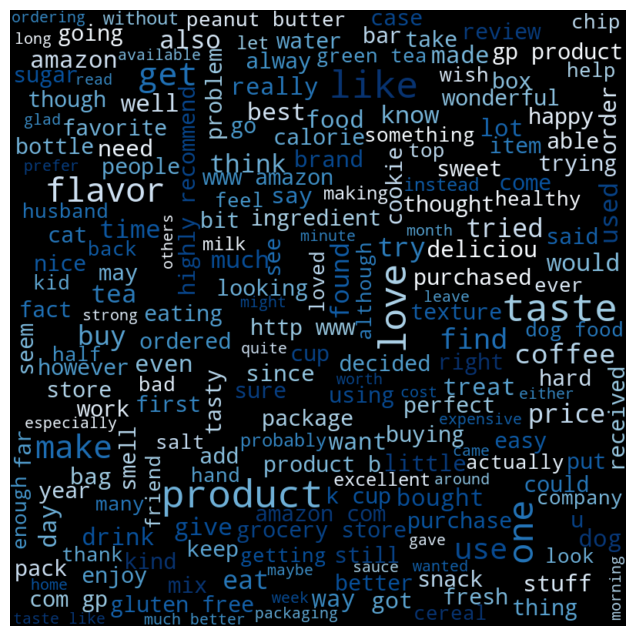

In [48]:
stop_words = set(stopwords.words("english"))
stop_words.update(["br", "href","good","great"]) # adding additinal words to stop_words 

# good and great removed because they were included in negative sentiment
pos = " ".join(review for review in positive_sentiment["all_sentences"])
wordcloud2 = WordCloud(width = 800, height = 800, max_font_size=50,min_font_size = 10,
                stopwords =  stop_words, colormap="Blues").generate(pos)
plt.figure(figsize = (10, 8)) 
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")
plt.savefig('static/images/positive_wordcloud.png',dpi=150 )
plt.show()

in the above the positive sentiment word cloud shows words such as taste, thought, better, flavor
product, like, love, 

# wordcloud -Negative sentiment

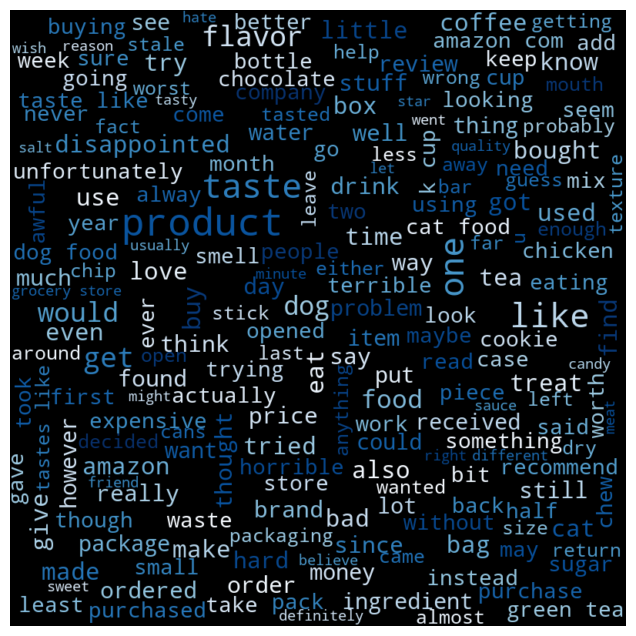

In [50]:
neg = " ".join(review for review in negative_sentiment["all_sentences"])
wordcloud3 = WordCloud(width = 800, height = 800, max_font_size=50,min_font_size = 10,
                stopwords =  stop_words, colormap="Blues").generate(neg)
plt.figure(figsize = (10,8)) 
plt.imshow(wordcloud3, interpolation='bilinear')
plt.axis("off")
plt.savefig('static/images/negative_wordcloud.png', dpi=150)
plt.show()

# Data Modeling

In [51]:
df_sentences

,all_sentences,Polarity,Sentiment
0,i have bought several of the vitality canned d...,0.450000,Positive
1,product arrived labeled as jumbo salted peanut...,-0.033333,Negative
2,this is a confection that has been around a fe...,0.133571,Positive
3,if you are looking for the secret ingredient i...,0.166667,Positive
4,great taffy at a great price there was a wide ...,0.483333,Positive
...,...,...,...
568448,great for sesame chicken this is a good if not...,0.204167,Positive
568449,i m disappointed with the flavor the chocolate...,-0.208333,Negative
568450,these stars are small so you can give of those...,-0.021875,Negative
568451,these are the best treats for training and rew...,0.521429,Positive


In [52]:
df_sentences=df_sentences.drop_duplicates(keep="first")
df_sentences

,all_sentences,Polarity,Sentiment
0,i have bought several of the vitality canned d...,0.450000,Positive
1,product arrived labeled as jumbo salted peanut...,-0.033333,Negative
2,this is a confection that has been around a fe...,0.133571,Positive
3,if you are looking for the secret ingredient i...,0.166667,Positive
4,great taffy at a great price there was a wide ...,0.483333,Positive
...,...,...,...
568448,great for sesame chicken this is a good if not...,0.204167,Positive
568449,i m disappointed with the flavor the chocolate...,-0.208333,Negative
568450,these stars are small so you can give of those...,-0.021875,Negative
568451,these are the best treats for training and rew...,0.521429,Positive


In [53]:

#taking the first 200000 of the dtatframe for the sake of run time

df_sentences = df_sentences.iloc[:100000]
df_sentences


,all_sentences,Polarity,Sentiment
0,i have bought several of the vitality canned d...,0.450000,Positive
1,product arrived labeled as jumbo salted peanut...,-0.033333,Negative
2,this is a confection that has been around a fe...,0.133571,Positive
3,if you are looking for the secret ingredient i...,0.166667,Positive
4,great taffy at a great price there was a wide ...,0.483333,Positive
...,...,...,...
116079,golden malted makes the best waffles we have t...,0.321071,Positive
116080,my family loves this mix we normally use it fo...,0.207672,Positive
116081,these are very mild flavored so they don t ove...,0.428175,Positive
116082,great taste at a fraction of the cost you ll p...,0.182143,Positive


In [54]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(use_idf=True, norm="l2", stop_words="english", max_df=0.7)
X = vectorizer.fit_transform(df_sentences.all_sentences)
y = df_sentences.Sentiment

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [55]:
X_train.shape,X_test.shape, y_train.shape,y_test.shape

((80000, 55760), (20000, 55760), (80000,), (20000,))

In [ ]:
models = []
models.append(('LR', LogisticRegression(solver="saga", multi_class="auto")))
models.append(("MNB", MultinomialNB()))
models.append(("MLP", MLPClassifier(hidden_layer_sizes=(10, ), activation="relu", random_state=0)))
models.append(('SVM', SVC(gamma='auto')))
models.append(('KNN', KNeighborsClassifier()))

# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))


In [ ]:
import numpy as np
import matplotlib.pyplot as pyplot

# Calculate mean scores for each algorithm if 'results' is a list of lists
mean_scores = [np.mean(r) for r in results]

positions = range(len(names))

pyplot.bar(positions, mean_scores, tick_label=names)
pyplot.title('Algorithm Comparison')
pyplot.ylabel('Average Scores')
plt.savefig('static/images/algorithm_comparison.png', dpi=150)
pyplot.show()


# Testing

In [ ]:
# Evaluate the models
def train_test(X_train, X_test, y_train, y_test, classifier):
    classifier.fit(X_train, y_train)
    pred = classifier.predict(X_test)
    
    print("Train score: {:.2f}".format(classifier.score(X_train, y_train)))
    print("Test score: {:.2f}\n".format(classifier.score(X_test, y_test)))
    print("Classification report:\n{}".format(classification_report(y_test, pred, zero_division=0)))
    print(confusion_matrix(y_test,pred))
    
    return classifier

In [ ]:
model= LogisticRegression(solver = "saga",multi_class = "auto")
model = train_test(X_train,X_test,y_train,y_test,model)
model.fit(X_train, y_train) # fitting the model using the training dataset

In [ ]:
# from the above the overall model accuracy is 93%, which is pretty good

# Predictions on new dataset using the most accurate model


In [49]:
text1="Bought a lot of batteries for Christmas and the AmazonBasics Cell have been good. I haven't noticed a difference between the brand name batteries and the Amazon Basic brand. Just a lot easier to purchase and have arrive at the house and have on hand. Will buy again."

In [50]:
text2="bought a lot gifts for chiritmass and im happy with quality and price"

In [51]:
text3="i used amazon for most of my purchases and im happy that i get my items on times everytime"

In [52]:
text4="the website is easy to use, did a good job"

In [53]:
new_texts = [text1,text2,text3,text4]
X_new = vectorizer.transform(new_texts)

In [54]:
predictions = model.predict(X_new)
predictions

array(['Positive', 'Positive', 'Positive', 'Positive'], dtype=object)

# Cluster Analysis

In [55]:
df_sentences.value_counts()

all_sentences                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           

In [56]:
from nltk.corpus import stopwords
import string
global_stopwords = stopwords.words("english")


In [57]:
local_stopwords = [c for c in string.punctuation]+\
                  ['’', '``', '…', '...', "''", '‘', '“', '”', ".", "!!!", "!", "also", "https", "url", "na"]

In [58]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(use_idf=True, norm="l2", stop_words=global_stopwords+local_stopwords, max_df=0.7)
X = vectorizer.fit_transform(df_sentences.all_sentences)

In [59]:
X.shape

(100000, 55921)

In [60]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters =10, random_state =0)
kmeans

KMeans(n_clusters=10, random_state=0)

In [61]:
!pip install --upgrade threadpoolctl



In [62]:
# fit the model

kmeans.fit(X)


KMeans(n_clusters=10, random_state=0)

# Examine Cluster OutCome


In [66]:
kmeans.cluster_centers_.shape

(10, 55921)

In [67]:
kmeans.labels_

array([5, 7, 3, ..., 3, 3, 2])

In [68]:
df_sentences["cluster"]=kmeans.labels_

In [69]:
df_sentences.head(2)

,all_sentences,Polarity,Sentiment,cluster
0,i have bought several of the vitality canned d...,0.450000,Positive,5
1,product arrived labeled as jumbo salted peanut...,-0.033333,Negative,7


In [72]:
cluster_value=df_sentences["cluster"].value_counts()
cluster_value

cluster
3    36684
2    12028
7    11750
4     9139
9     8016
6     5472
0     5329
8     4608
5     3972
1     3002
Name: count, dtype: int64

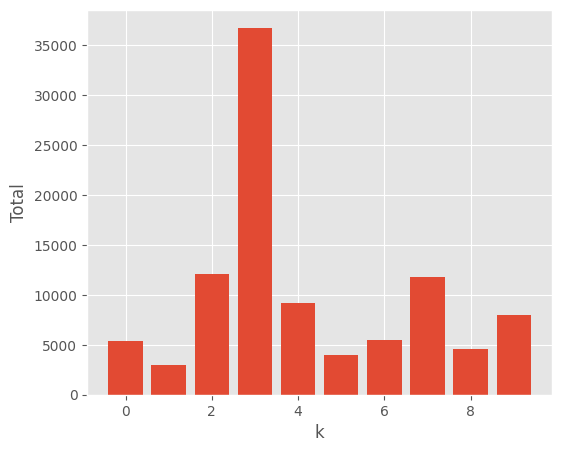

In [77]:
#calucuateing for the cluster counts
cluster_counts =df_sentences["cluster"].value_counts()
#calculating the total counts
total_counts=cluster_counts.sum()
#Calucating the percentages
cluster_percentages =(cluster_counts/total_counts)*100
#Plottings
plt.figure(figsize =(6,5))
plt.bar(cluster_counts.index, cluster_counts.values)# use index and values to align data correctly
plt.xlabel("k")
plt.ylabel("Total")
plt.savefig("static/images/cluster_count.png")
plt.show()

# 10 random reviews from largest cluster

In [80]:
df_sentences[df_sentences.cluster==3].sample(10, random_state=0)

,all_sentences,Polarity,Sentiment,cluster
90308,if you re looking for the real german haribo t...,-0.054630,Negative,3
8508,if you like your keurig you need to try this k...,0.123939,Positive,3
32712,very tasty syrup organic too grade b is less p...,0.156667,Positive,3
110315,this seems to be a very good product but no di...,0.107857,Positive,3
65425,what can you say about an emerald nuts product...,0.338889,Positive,3
64395,this is really too much cappuchino for a once ...,0.060000,Positive,3
73480,i tried it in costa rica it is highly recommen...,0.364444,Positive,3
56910,i love to eat it as a snack while reading befo...,0.200000,Positive,3
49206,i ve been a maynard s fan for years and never ...,0.286667,Positive,3
105781,i like this product but don t love it dips are...,0.027619,Positive,3


# 10 random reviews from smallest cluster

In [81]:
df_sentences[df_sentences.cluster==1].sample(10, random_state=0)

,all_sentences,Polarity,Sentiment,cluster
11139,are these really gluten free because they sure...,0.147604,Positive,1
30225,i ve tried ten different gf bread mixes and th...,0.101833,Positive,1
113871,this is absolutely one of my favorite quick gl...,0.227564,Positive,1
114432,this is the most horrendous mix i have ever us...,-0.004444,Negative,1
115998,this may not taste exactly like peanut butter ...,0.300893,Positive,1
80787,my kids love these we are a gluten free family...,0.288946,Positive,1
104691,how wrong can peanut butter go really i d thin...,0.136250,Positive,1
40701,i love craisins and was so pleased with the ta...,0.307576,Positive,1
58095,the cake i made using sugar twin really did ta...,0.217308,Positive,1
100675,my two little boys love these i can t tell the...,0.170833,Positive,1


# Keyword Network Analysis

In [84]:
import nltk

df_sentences["words"] = df_sentences.all_sentences.apply(lambda x: nltk.word_tokenize(x))
df_sentences.head(2)

,all_sentences,Polarity,Sentiment,cluster,words
0,i have bought several of the vitality canned d...,0.450000,Positive,5,"[i, have, bought, several, of, the, vitality, ..."
1,product arrived labeled as jumbo salted peanut...,-0.033333,Negative,7,"[product, arrived, labeled, as, jumbo, salted,..."


In [85]:
from nltk.corpus import stopwords
import string

global_stopwords = stopwords.words("english")

local_stopwords = [c for c in string.punctuation] +\
                  ['’', '``', '…', '...', "''", '‘', '“', '”', ".", "!!!", "!", "also", "https", "url", "na"]

In [87]:
from collections import Counter

###################################################################################
# The 'counter' object will have all the word count information. 
# The 'co_counter' object will have all the co-occurrence count information.
###################################################################################
counter = Counter()
co_counter = dict()

for l in df_sentences.words:
    word_set = set()
    
    for item in l:
        word = item.lower()
        
        if word not in (global_stopwords + local_stopwords):
            word_set.add(word)

    counter.update(word_set)
    
    ###################################################################################
    # Calculate co-occurrence count of two words and save it in 'co_counter' 
    ###################################################################################
    words = list(word_set)
    for word1 in words:
        if word1 not in co_counter:
            co_counter[word1] = dict()
        
        for word2 in words:

            ######################################
            # Skip if the two words are the same.
            ######################################
            if word1 == word2:
                continue
            
            if word2 not in co_counter[word1]:
                co_counter[word1][word2] = 1
            else:
                co_counter[word1][word2] += 1

Check the top-30 most common words. If you have any words that you would not want to see, you can remove them by including them in the local_stopwords list above.

In [90]:
counter.most_common(30) # frequencies

[('like', 31335),
 ('good', 27991),
 ('br', 25922),
 ('great', 24221),
 ('taste', 23259),
 ('one', 22913),
 ('product', 21273),
 ('flavor', 19303),
 ('love', 18492),
 ('would', 17621),
 ('get', 15719),
 ('really', 14874),
 ('amazon', 14560),
 ('much', 14265),
 ('time', 12605),
 ('little', 12380),
 ('buy', 12192),
 ('coffee', 12192),
 ('best', 11873),
 ('tried', 11724),
 ('price', 11707),
 ('use', 11638),
 ('well', 11354),
 ('even', 11352),
 ('make', 11213),
 ('find', 11208),
 ('better', 11190),
 ('try', 10996),
 ('food', 10737),
 ('eat', 9560)]